## 1. K-Means Clustering

In [1]:
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys

In [4]:
wh = pd.read_csv("C:/Users/akhil/practice notebook 1/data/2017.csv") #Read the dataset
wh.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [5]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [34]:
wh1 = wh[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] #Subsetting the data

In [35]:
ss = StandardScaler()
ss.fit_transform(wh1)

array([[ 1.93599602,  1.50618765,  1.20357658, ...,  0.8569643 ,
         1.90308437,  0.85629599],
       [ 1.92269283,  1.18651768,  1.26503623, ...,  0.80685634,
         2.73999784,  0.92989102],
       [ 1.90672969,  1.1823454 ,  1.47266877, ...,  1.70201314,
         0.30006609,  0.94796425],
       ...,
       [-1.77816933, -1.12910094, -0.51306362, ...,  0.79923322,
        -0.56334657, -2.4660431 ],
       [-2.17193469, -2.12929212, -1.95262416, ..., -0.31596505,
        -0.38459935, -0.33549229],
       [-2.35994869, -2.34773594, -4.15212515, ...,  0.253028  ,
        -0.65680192,  0.43290816]])

In [36]:
#K means Clustering 
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 3)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

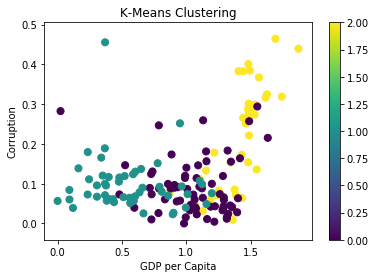

In [37]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

## 2. Agglomerative Clustering

In [38]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh1, 2)
agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((wh1.shape[1]),'agglomerative',agglomerative)

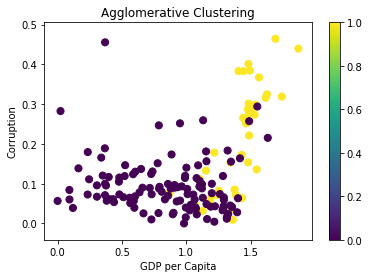

In [39]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

## 3. Affinity Propagation

In [40]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(wh1)
affinity = pd.DataFrame(clust_labels2)
wh1.insert((wh1.shape[1]),'affinity',affinity)

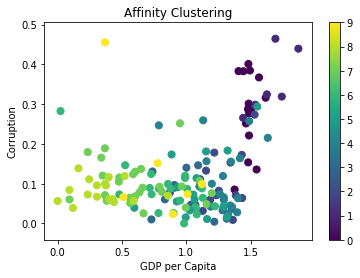

In [41]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

## 4. Guassian Mixture Modelling

In [42]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(wh1,2)
gmm = pd.DataFrame(clust_labels3)
wh1.insert((wh1.shape[1]),'gmm',gmm)

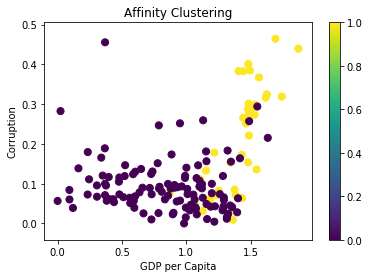

In [43]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=gmm[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

## 5. DBSCAN Clustering

In [49]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

Automatically created module for IPython interactive environment


In [45]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [46]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [52]:
#print(labels)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [48]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


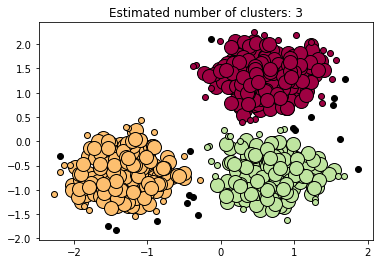

In [50]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()